In [2]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv ("data/athlets.csv")
df["Medal"]=df["Medal"].apply(lambda x: 1 if str(x) != "nan" else 0)
df.dropna(inplace=True)
df.reset_index(drop=True)
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,0
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,0
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",0
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,0


In [3]:
df.describe()

,ID,Age,Height,Weight,Year,Medal
count,206165.000000,206165.000000,206165.000000,206165.000000,206165.000000,206165.000000
mean,68616.017675,25.055509,175.371950,70.688337,1989.674678,0.146392
std,38996.514355,5.483096,10.546088,14.340338,20.130865,0.353500
min,1.000000,11.000000,127.000000,25.000000,1896.000000,0.000000
25%,35194.000000,21.000000,168.000000,60.000000,1976.000000,0.000000
50%,68629.000000,24.000000,175.000000,70.000000,1992.000000,0.000000
75%,102313.000000,28.000000,183.000000,79.000000,2006.000000,0.000000
max,135571.000000,71.000000,226.000000,214.000000,2016.000000,1.000000


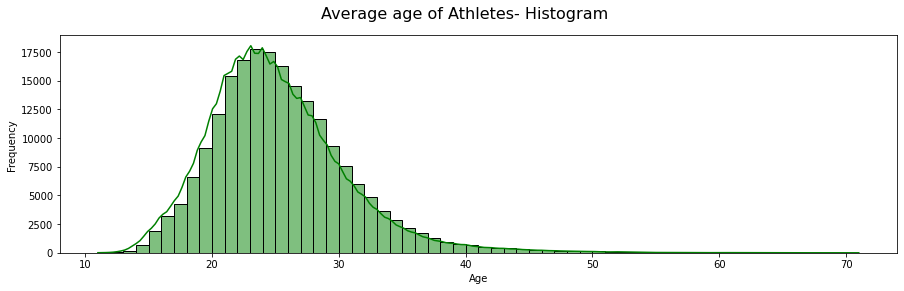

In [12]:
fig, ax = plt.subplots(figsize=(15, 4))


sns.histplot(data=df, x="Age", kde=True, stat="frequency", color="green", bins=60)

fig.suptitle('Average age of Athletes- Histogram', fontsize=16)

#plt.tight_layout()

plt.show()

# Age attribute was selected

H0: The average age of atleths in Olympic Games is 25.06.

H1: The average age of atleths in Olympic Games is bigger than 25.06.

In [14]:
k = 500
sampleAge = df.sample(k).reset_index(drop=True)
sampleAge.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,15488,"Christopher Deon ""Chris"" Brown",M,37.0,178.0,75.0,Bahamas,BAH,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Men's 400 metres,0
1,85553,Robert Frederick Newbery,M,25.0,174.0,70.0,Australia,AUS,2004 Summer,2004,Summer,Athina,Diving,Diving Men's Synchronized Platform,1
2,36017,"Hlia ""Fofo"" Rogrio de Souza Pinto",F,38.0,173.0,63.0,Brazil,BRA,2008 Summer,2008,Summer,Beijing,Volleyball,Volleyball Women's Volleyball,1
3,47301,Lothar Heinrich,M,43.0,176.0,75.0,Austria,AUT,1984 Summer,1984,Summer,Los Angeles,Shooting,"Shooting Men's Small-Bore Rifle, Three Positio...",0
4,104606,Yuliana Bulatovna Salakhova,F,23.0,179.0,71.0,Russia,RUS,2008 Summer,2008,Summer,Beijing,Canoeing,"Canoeing Women's Kayak Singles, 500 metres",0


In [15]:
sampleAge.describe()

,ID,Age,Height,Weight,Year,Medal
count,500.000000,500.000000,500.0000,500.000000,500.000000,500.000000
mean,70251.168000,25.474000,175.3000,70.187000,1989.588000,0.168000
std,38547.681486,5.565183,10.5831,14.593336,19.964253,0.374241
min,47.000000,14.000000,143.0000,34.000000,1908.000000,0.000000
25%,37678.500000,21.000000,168.0000,60.000000,1976.000000,0.000000
50%,71856.000000,25.000000,175.0000,69.000000,1994.000000,0.000000
75%,102957.250000,29.000000,182.2500,78.000000,2006.000000,0.000000
max,135546.000000,50.000000,208.0000,161.000000,2016.000000,1.000000


**INDEPDENT T-TEST USING RESEARCHPY**

In [19]:
import researchpy as rp
import scipy.stats as stats
summary, results = rp.ttest(group1= df["Age"], group1_name= "Main",
                            group2= sampleAge["Age"], group2_name= "Sample")
print(summary)

   Variable         N       Mean        SD        SE  95% Conf.   Interval
0      Main  206165.0  25.055509  5.483096  0.012076  25.031841  25.079177
1    Sample     500.0  25.474000  5.565183  0.248883  24.985013  25.962987
2  combined  206665.0  25.056521  5.483321  0.012062  25.032881  25.080162


In [20]:
print(results)

              Independent t-test      results
0  Difference (Main - Sample) =       -0.4185
1          Degrees of freedom =   206663.0000
2                           t =       -1.7045
3       Two side test p value =        0.0883
4      Difference < 0 p value =        0.0441
5      Difference > 0 p value =        0.9559
6                   Cohen's d =       -0.0763
7                   Hedge's g =       -0.0763
8               Glass's delta =       -0.0763
9                 Pearson's r =        0.0037


**INDEPDENT T-TEST USING SCIPY.STATS**

In [21]:
stats.ttest_ind(df["Age"],sampleAge["Age"])

Ttest_indResult(statistic=-1.7045256235651505, pvalue=0.08828443629155797)

**Pvalue** is bigger than alfa(5%). The difference is not statistically significant. We can not reject the null hypothesis.

# Exercici 2

Continua amb el conjunt de dades de tema esportiu que t'agradi i selecciona dos altres atributs del conjunt de dades. Calcula els p-valors i digues si rebutgen la hipòtesi nul·la agafant un alfa de 5%.

In [22]:
medal=df[df["Medal"]==1]
medal.describe()

,ID,Age,Height,Weight,Year,Medal
count,30181.000000,30181.000000,30181.000000,30181.000000,30181.000000,30181.0
mean,70225.949604,25.429012,177.642358,73.753554,1988.005964,1.0
std,38839.720551,5.049684,10.924188,15.004992,22.718451,0.0
min,16.000000,13.000000,136.000000,28.000000,1896.000000,1.0
25%,37494.000000,22.000000,170.000000,63.000000,1976.000000,1.0
50%,69771.000000,25.000000,178.000000,73.000000,1992.000000,1.0
75%,104111.000000,28.000000,185.000000,83.000000,2006.000000,1.0
max,135563.000000,66.000000,223.000000,182.000000,2016.000000,1.0


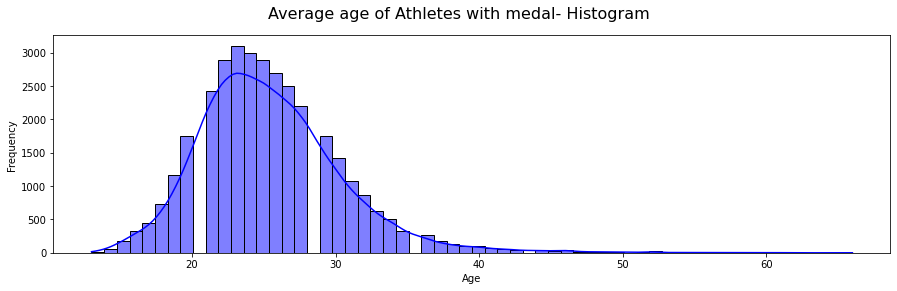

In [24]:
fig, ax = plt.subplots(figsize=(15, 4))


sns.histplot(data=medal, x="Age", kde=True, stat="frequency", color="blue", bins=60)

fig.suptitle('Average age of Athletes with medal- Histogram', fontsize=16)

#plt.tight_layout()

plt.show()

# Age and Medal attributes were selected

H0: The average age of atleths with medal in Olympic Games is 25.42.

H1: The average age of atleths with medal in Olympic Games is bigger than 25.42.

In [27]:
k = 500
medal_sample = medal.sample(k).reset_index(drop=True)
medal_sample.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,30948,Robin Duvillard,M,30.0,178.0,71.0,France,FRA,2014 Winter,2014,Winter,Sochi,Cross Country Skiing,Cross Country Skiing Men's 4 x 10 kilometres R...,1
1,47479,Rdiger Helm,M,23.0,188.0,87.0,East Germany,GDR,1980 Summer,1980,Summer,Moskva,Canoeing,"Canoeing Men's Kayak Singles, 1,000 metres",1
2,43267,Bernhard Gruber,M,31.0,185.0,71.0,Austria,AUT,2014 Winter,2014,Winter,Sochi,Nordic Combined,Nordic Combined Men's Team,1
3,42140,Danielle Goyette,F,32.0,168.0,70.0,Canada,CAN,1998 Winter,1998,Winter,Nagano,Ice Hockey,Ice Hockey Women's Ice Hockey,1
4,42289,"Timothy Joseph Michael ""Tim"" Graham",M,25.0,178.0,65.0,Great Britain,GBR,1964 Summer,1964,Summer,Tokyo,Athletics,Athletics Men's 4 x 400 metres Relay,1


In [28]:
medal_sample.describe()

,ID,Age,Height,Weight,Year,Medal
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.0
mean,69931.810000,25.628000,177.024000,72.639000,1988.288000,1.0
std,39482.004612,5.278384,10.445364,14.477893,21.446234,0.0
min,953.000000,16.000000,139.000000,36.000000,1904.000000,1.0
25%,38433.250000,22.000000,170.000000,63.000000,1976.000000,1.0
50%,67284.500000,25.000000,177.000000,71.000000,1992.000000,1.0
75%,106452.750000,28.000000,183.000000,81.000000,2004.000000,1.0
max,135545.000000,54.000000,213.000000,134.000000,2016.000000,1.0


**INDEPDENT T-TEST USING RESEARCHPY**

In [29]:
summary, results = rp.ttest(group1= medal["Age"], group1_name= "Medal",
                            group2= medal_sample["Age"], group2_name= "Sample Medal")
print(summary)


       Variable        N       Mean        SD        SE  95% Conf.   Interval
0         Medal  30181.0  25.429012  5.049684  0.029067  25.372039  25.485984
1  Sample Medal    500.0  25.628000  5.278384  0.236057  25.164213  26.091787
2      combined  30681.0  25.432254  5.053467  0.028851  25.375706  25.488803


In [31]:
print(results)

                     Independent t-test     results
0  Difference (Medal - Sample Medal) =      -0.1990
1                 Degrees of freedom =   30679.0000
2                                  t =      -0.8733
3              Two side test p value =       0.3825
4             Difference < 0 p value =       0.1913
5             Difference > 0 p value =       0.8087
6                          Cohen's d =      -0.0394
7                          Hedge's g =      -0.0394
8                      Glass's delta =      -0.0394
9                        Pearson's r =       0.0050


**INDEPDENT T-TEST USING SCIPY.STATS**

In [30]:
stats.ttest_ind(medal["Age"],medal_sample["Age"])

Ttest_indResult(statistic=-0.8732802205022561, pvalue=0.38251719400974515)

**Pvalue** is bigger than alfa(5%). The difference is not statistically significant. We can not reject the null hypothesis.

# Exercici 3

Continua amb el conjunt de dades de tema esportiu que t'agradi i selecciona tres atributs del conjunt de dades. Calcula el p-valor i digues si rebutja la hipòtesi nul·la agafant un alfa de 5%.

In [50]:
medal.groupby("Sex").sum()

,ID,Age,Height,Weight,Year,Medal
Sex,,,,,,
F,741008119,254585.0,1765016.0,654323.0,20654926,10350
M,1378481266,512888.0,3596408.0,1571633.0,39345082,19831


In [34]:
medal_man=medal["Age"][medal["Sex"]=="M"]
medal_man.describe()

count    19831.000000
mean        25.862942
std          4.969973
min         13.000000
25%         22.000000
50%         25.000000
75%         28.000000
max         66.000000
Name: Age, dtype: float64

In [73]:
k=50
medal_man_sample=medal_man.sample(k).reset_index(drop=True)
medal_man_sample.describe()

count    50.00000
mean     27.62000
std       5.81304
min      19.00000
25%      23.25000
50%      27.00000
75%      30.75000
max      44.00000
Name: Age, dtype: float64

# Age, sex and Medal attributes were selected

H0: The average age of atleths-man with medal in Olympic Games is 25.86.

H1: The average age of atleths - man with medal in Olympic Games is bigger than 25.86.

**INDEPDENT T-TEST USING RESEARCHPY**

In [74]:
summary, results = rp.ttest(group1=medal_man , group1_name= "Medal - man",
                            group2= medal_man_sample, group2_name= "Medal - man - sample")
print(summary)


               Variable        N       Mean        SD        SE  95% Conf.  \
0           Medal - man  19831.0  25.862942  4.969973  0.035292  25.793766   
1  Medal - man - sample     50.0  27.620000  5.813040  0.822088  25.967952   
2              combined  19881.0  25.867361  4.972880  0.035269  25.798231   

    Interval  
0  25.932118  
1  29.272048  
2  25.936490  


**INDEPDENT T-TEST USING SCIPY.STATS**

In [75]:
stats.ttest_ind( medal_man, medal_man_sample)

Ttest_indResult(statistic=-2.4955910442794034, pvalue=0.012582789682919449)

**Interpretation**

**Pvalue** is smaller than alfa(5%). The difference is statistically significant. We can reject the null hypothesis.